In [1]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
from whereswitch import multiwhereswitch

What this code does:

1. Load data files
2. Compute gas masses of galaxies
3. Compute stellar masses of galaxies
4. Compute halo virulent masses of galaxies
5. Save masses to a CSV file

# 1. Load data files

In [2]:
# load data from Hill papers into pandas.DataFrame objects
# set index to be the (C1, C3, C6, ...) labels
df_Hill_2020 = pandas.read_fwf('data_from_papers/Hill_2020.csv').set_index('label')
df_Hill_2021 = pandas.read_fwf('data_from_papers/Hill_2021.csv').set_index('label')
df_Rotermund_2021 = pandas.read_fwf('data_from_papers/Rotermund_2021.csv').set_index('label')
df_Apostolovski = pandas.read_fwf('data_from_papers/Apostolovski.csv').set_index('label')

In [3]:
# construct a dictionary mapping from the old lettered
# labels (A, B, C, ...) to the new Cx labels (C1, C3, C6, ...)
# uses contents of Hill_2020.csv file
label_map = {k:v for v,k in df_Hill_2020['label2'][~df_Hill_2020['label2'].isna()].iteritems()}
label_map

{'A': 'C1',
 'J': 'C2',
 'B': 'C3',
 'D': 'C4',
 'F': 'C5',
 'C': 'C6',
 'K': 'C7',
 'E': 'C8',
 'I': 'C9',
 'H': 'C10',
 'L': 'C11',
 'G': 'C13',
 'N': 'C14',
 'M': 'C17'}

In [4]:
# load data from Miller paper into pandas.DataFrame object
df_Miller_2018 = pandas.read_fwf('data_from_papers/Miller_2018.csv')
# add a new column to the Miller data with the new (C1, C3, C6, ...) labels
df_Miller_2018['label'] = df_Miller_2018['label2'].map(label_map)
# set the index of the Miller DataFrame to be the (C1, C3, C6, ...) labels
df_Miller_2018 = df_Miller_2018.set_index('label')

In [5]:
# combine all the data into a single pandas.DataFrame object
# nested column names segregate based on data source
df = pandas.concat((df_Hill_2020, df_Hill_2021, df_Miller_2018, df_Rotermund_2021, df_Apostolovski), keys=('Hill_2020', 'Hill_2021', 'Miller_2018', 'Rotermund_2021', 'Apostolovski'), axis=1)

In [6]:
# check that all of the old labels (A, B, C, ...) line up in the data from each paper
assert(all(df['Hill_2020', 'label2'].isna() | (df['Hill_2020', 'label2'] == df['Hill_2021', 'label2']) & (df['Hill_2020', 'label2'] == df['Miller_2018', 'label2'])))

# df.loc[:,[('Hill_2020', 'label2'), ('Hill_2021', 'label2'), ('Miller_2018', 'label2')]]

In [7]:
# add a column to the Hill_2020 data with the method used for computing gas estimates
# all values Hill reported were computed using the CO34 method
# method: https://stackoverflow.com/questions/67477744/pandas-numpy-where-and-numpy-nan/
df['Hill_2020', 'method'] = np.where(df['Hill_2020', 'Mgas'].notna(), 'CO43', None)
df['Hill_2020', 'method'].fillna(np.nan, inplace=True) # convert None to NaN

In [8]:
# compute percent uncertainties, add as columns to df
df['Hill_2020', 'pu_Mdyn'] = df['Hill_2020', 'u_Mdyn'] / df['Hill_2020', 'Mdyn']
df['Hill_2020', 'pu_Mgas'] = df['Hill_2020', 'u_Mgas'] / df['Hill_2020', 'Mgas']
df['Hill_2021', 'pu_M*'] = df['Hill_2021', 'u_M*'] / df['Hill_2021', 'M*']
df['Miller_2018', 'pu_Mgas'] = df['Hill_2020', 'u_Mgas'] / df['Miller_2018', 'Mgas']

In [9]:
# compute ratio of Miller's Mgas to Hill's Mgas, add as a column to df
df['derived', 'Miller/Hill'] = df['Miller_2018', 'Mgas'] / df['Hill_2020', 'Mgas']

In [10]:
# let's look at what we've got
df

Hill_2020                                                       \
             label2  Mdyn u_Mdyn Mgas u_Mgas   FCii u_FCii FCO43 u_FCO43   
label                                                                      
C1                A  27.0    1.1  7.5    0.7  16.86   0.20  0.98    0.03   
C2                J   6.9    0.3  2.1    0.2   8.82   0.13  0.27    0.02   
C3                B   9.9    1.0  4.3    0.4   7.89   0.12  0.56    0.02   
C4                D  13.8    1.7  3.0    0.3   5.90   0.15  0.38    0.02   
C5                F  18.0    1.5  1.1    0.2   5.19   0.15  0.14    0.02   
C6                C   3.7    0.2  3.4    0.3   5.16   0.07  0.44    0.02   
C7                K   3.6    1.4  1.0    0.1   3.76   0.09  0.13    0.01   
C8                E   2.1    0.2  2.4    0.3   3.68   0.12  0.31    0.02   
C9                I  10.8    0.8  0.9    0.1   3.35   0.11  0.12    0.02   
C10               H   3.6    0.4  1.1    0.2   2.96   0.10  0.14    0.02   
C11               L   3.7    0.3  0.3    0.1   2.70   0.11  0.04    0.01   
C12             NaN   3.0    1.2  NaN    NaN   2.62   0.09   NaN     NaN   
C13               G   3.1    0.9  0.8    0.1   1.84   0.08  0.10    0.01   
C14               N   2.1    0.9  0.2    0.1   1.70   0.08  0.03    0.01   
C15             NaN   4.2    1.7  NaN    NaN   1.65   0.09   NaN     NaN   
C16             NaN   2.2    1.2  NaN    NaN   1.11   0.06   NaN     NaN   
C17               M   1.3    0.6  NaN    NaN   0.93   0.09   NaN     NaN   
C18             NaN   3.7    1.6  NaN    NaN   0.86   0.09   NaN     NaN   
C19             NaN   1.4    0.6  NaN    NaN   0.85   0.07   NaN     NaN   
C20             NaN   1.1    0.5  NaN    NaN   0.51   0.06   NaN     NaN   
C21             NaN   0.9    0.4  NaN    NaN   0.35   0.04   NaN     NaN   
C22             NaN   0.2    0.1  NaN    NaN   0.33   0.03   NaN     NaN   
C23             NaN   0.5    0.2  NaN    NaN   0.28   0.03   NaN     NaN   
LBG3            NaN   NaN    NaN  NaN    NaN    NaN    NaN   NaN     NaN   
LAE-ID72        NaN   NaN    NaN  NaN    NaN    NaN    NaN   NaN     NaN   
LBG2            NaN   NaN    NaN  NaN    NaN    NaN    NaN   NaN     NaN   
LAE-ID21        NaN   NaN    NaN  NaN    NaN    NaN    NaN   NaN     NaN   
LAE-ID56        NaN   NaN    NaN  NaN    NaN    NaN    NaN   NaN     NaN   
LAE-ID109       NaN   NaN    NaN  NaN    NaN    NaN    NaN   NaN     NaN   
LAE-ID74        NaN   NaN    NaN  NaN    NaN    NaN    NaN   NaN     NaN   
LAE-ID91        NaN   NaN    NaN  NaN    NaN    NaN    NaN   NaN     NaN   
LAE-ID118       NaN   NaN    NaN  NaN    NaN    NaN    NaN   NaN     NaN   

                  ... Rotermund_2021       Apostolovski         Hill_2020  \
             SFR  ...            SFR u_SFR         FLya  u_FLya    method   
label             ...                                                       
C1         980.0  ...            NaN   NaN          NaN     NaN      CO43   
C2         200.0  ...            NaN   NaN          NaN     NaN      CO43   
C3         840.0  ...            NaN   NaN          NaN     NaN      CO43   
C4         540.0  ...            NaN   NaN          NaN     NaN      CO43   
C5         400.0  ...            NaN   NaN          NaN     NaN      CO43   
C6         590.0  ...            NaN   NaN          NaN     NaN      CO43   
C7          78.0  ...            NaN   NaN          NaN     NaN      CO43   
C8         460.0  ...            NaN   NaN          NaN     NaN      CO43   
C9         170.0  ...            NaN   NaN          NaN     NaN      CO43   
C10        180.0  ...            NaN   NaN          NaN     NaN      CO43   
C11         37.0  ...            NaN   NaN          NaN     NaN      CO43   
C12         28.0  ...            NaN   NaN          NaN     NaN       NaN   
C13        170.0  ...            NaN   NaN          NaN     NaN      CO43   
C14         49.0  ...            NaN   NaN          NaN     NaN      CO43   
C15         34.0  ...            NaN   N

# 2. Gas masses

## 2.1 Galaxies detected by ALMA (Miller 2018, Hill 2020)

### Boost Hill's gas masses to agree with Miller's gas masses

Hill's gas masses are likely underestimates since Hill chose $\alpha_{CO} = 1$ (p. 13). Instead, $\alpha_{CO}$ is probably around 2 or 3. We boost all of Hill's gas estimates by a common factor to correct for this.

To estimate the boost factor, we take the mean ratio of Miller's data to Hill's data. When computing this boost factor, we only consider galaxies for which we have good mass estimates from Hill and Miller based on $CO_{3-4}$ emission (as opposed to the less-reliable $[C\,II]$ method).

In [11]:
# find indeces in df where both Miller's and Hill's gas mass estimates were computed from CO34 emission
indices_Mill_Hill_CO = (df['Miller_2018', 'method'] == 'CO43') & (df['Hill_2020', 'method'] == 'CO43')
# find mean ratio of Miller's gas masses to Hill's, for these galaxies
Miller_Hill_ratio = df.loc[indices_Mill_Hill_CO, ('derived', 'Miller/Hill')].mean()
print('Miller_Hill_ratio:', Miller_Hill_ratio)

Miller_Hill_ratio: 2.1947764976321746


In [12]:
# add a new column to df that is Hill's gas measurements, but boosted by this factor
df['Hill_2020', 'Mgas_boosted'] = df['Hill_2020', 'Mgas'] * Miller_Hill_ratio

### Estimate gas masses based on Hill's Cii when CO43 flux is too weak

Hill (2020) calculated gas masses based on the measured $CO_{3-4}$ flux FCO43, but sometimes this flux was too weak to get a good result. We can estimate what the gas mass should have been by:
1. Coming up with a scaling factor relating the $[C\,II]$ flux FCii and the $CO_{3-4}$ flux FCO43.
2. Using the scaling factor to estimate what the $CO_{3-4}$ flux should have been based on the $[C\,II]$ flux.
3. Estimating the gas mass using the scaling factor that relates gas mass to $CO_{3-4}$ flux.

Notes:
* We want to compute what the gas estimate should be *after* we have applied the boost above.
* We could just take the $CO_{3-4}$ to $M_{gas}$ from Hill's paper, but it is more convenient to just compute it using values in the table.

In [13]:
# find the indices where Hill had sufficient CO43 flux to estimate gas mass
indices_Hill_CO43 = df['Hill_2020', 'method'] == 'CO43'

# add column of ratio of CO43 flux to Cii flux
# leave values as NaN if CO43 flux was too small to estimate gas mass
df['Hill_2020', 'CO43/Cii'] = np.where(indices_Hill_CO43, 
                                       df['Hill_2020', 'FCO43'] / df['Hill_2020', 'FCii'],
                                       np.nan)
# compute mean ratio for galaxies where CO43 flux was large enough to compute gas mass
ratio_CO43_Cii = df['Hill_2020', 'CO43/Cii'].mean()

# add column of ratio of Mgas to CO43 flux
# leave values as NaN if CO43 flux was too small to estimate gas mass
df['Hill_2020', 'Mgas/CO43'] = np.where(indices_Hill_CO43, 
                                       df['Hill_2020', 'Mgas'] / df['Hill_2020', 'FCO43'],
                                       np.nan)
# compute mean ratio for galaxies where CO43 flux was large enough to compute gas mass
ratio_Mgas_CO43 = df['Hill_2020', 'Mgas/CO43'].mean()

# add column of Mgas estimates based on Cii
df['Hill_2020', 'Mgas_Cii'] = Miller_Hill_ratio * ratio_Mgas_CO43 * ratio_CO43_Cii * df['Hill_2020', 'FCii']
# observe that we also apply the boost from above, to bring in line with Miller's values


### Choose "final" gas mass

For the simulation gas masses, we will use the boosted Hill estimates as these are considered more reliable than Miller's. We will use CO43 where available and Cii otherwise.

In [14]:
# create columns for the chosen gass mass, a description of the method, and the source of data
df['final', 'Mgas'], df['final', 'Mgas_method'], df['final', 'Mgas_source'] = multiwhereswitch(
    # condition: Hill estimated gas mass using CO43
    df['Hill_2020', 'method'] == 'CO43',
    [ # result for this condition
        df['Hill_2020', 'Mgas_boosted'], # gas mass
        'CO43', # method
        'Hill_2020' # source
    ],
    # condition: we have a gas mass estimate using Cii
    df['Hill_2020', 'Mgas_Cii'].notna(),
    [ # result for this condition
        df['Hill_2020', 'Mgas_Cii'], # gas mass
        'Cii', # method
        'Hill_2020' # source
    ],
    force_object=[False, True, True] # we set to True for columns containing strings
)
# let's look at what we've got
df['final']

,Mgas,Mgas_method,Mgas_source
label,,,
C1,16.460824,CO43,Hill_2020
C2,4.609031,CO43,Hill_2020
C3,9.437539,CO43,Hill_2020
C4,6.584329,CO43,Hill_2020
C5,2.414254,CO43,Hill_2020
C6,7.462240,CO43,Hill_2020
C7,2.194776,CO43,Hill_2020
C8,5.267464,CO43,Hill_2020
C9,1.975299,CO43,Hill_2020


## 2.2 LAEs and LBGs (Apostolovski, Roterm)

For the LAEs and LBGs, our only useful measurements are the star formation rates (SFR). We'll scale the SFRs to gas masses using the data from Hill (2020). This is very rough, though, as you can see in the histograms. It's good enough for us, though, and it gives approximations that should be good within an order of magnitude or so.

### Determine scale factor between SFR and gas mass

In [15]:
x = df['final', 'Mgas'] / df['Hill_2020', 'SFR']
df['derived', 'Mgas/SFR'] = x

/usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


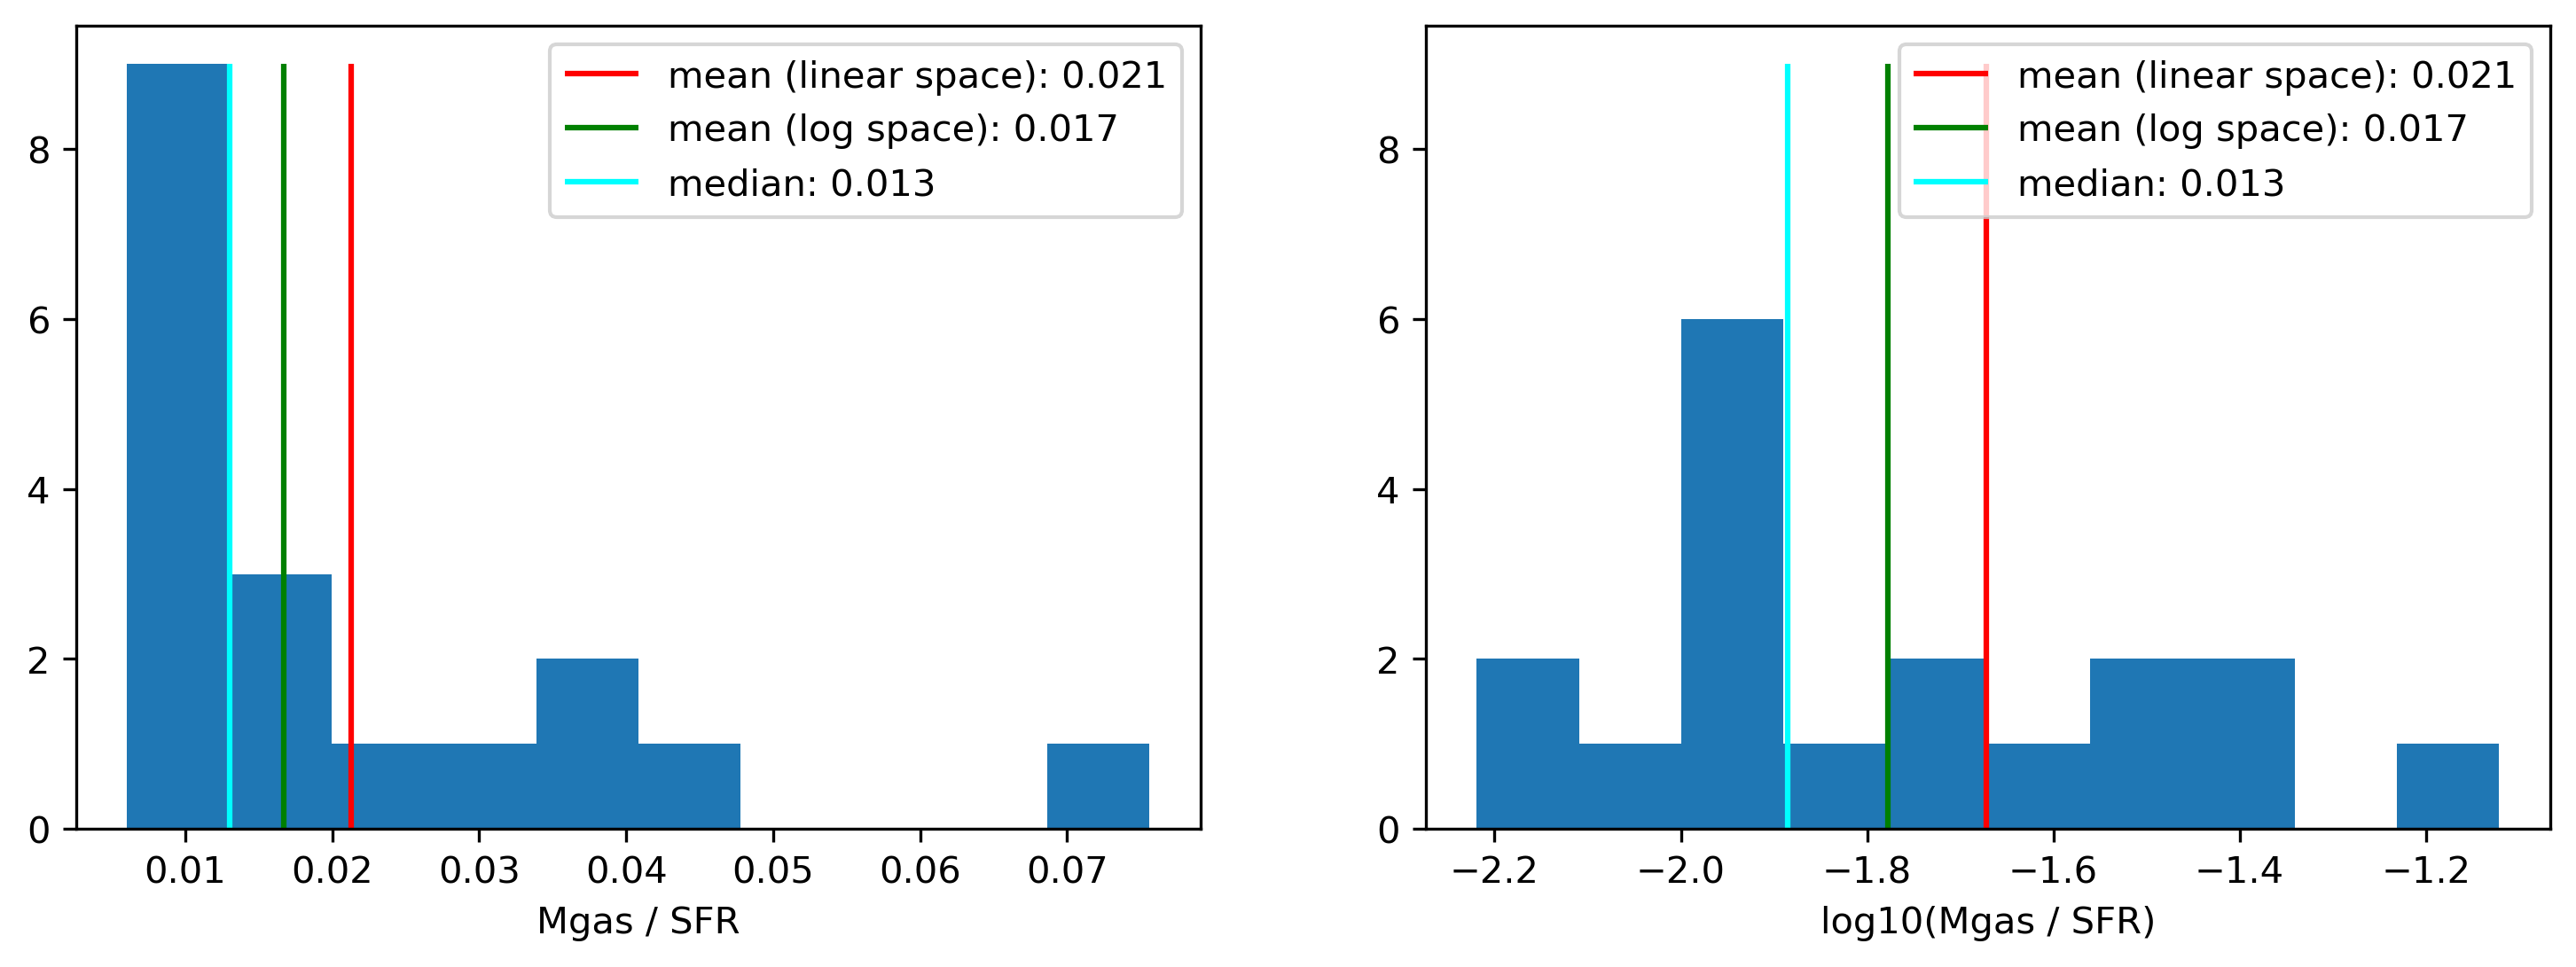

In [16]:
plt.figure(figsize=(12, 4), dpi=300)

plt.subplot(1, 2, 1)
plt.hist(x)
plt.xlabel('Mgas / SFR')
plt.vlines((x.mean()), 0, 9, color='red', label='mean (linear space): {:.3f}'.format(x.mean()))
plt.vlines(10**(np.log10(x).mean()), 0, 9, color='green', label='mean (log space): {:.3f}'.format(10**(np.log10(x).mean())))
plt.vlines((x.median()), 0, 9, color='cyan', label='median: {:.3f}'.format(x.median()))
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(np.log10(x))
plt.xlabel('log10(Mgas / SFR)')
plt.vlines(np.log10(x.mean()), 0, 9, color='red', label='mean (linear space): {:.3f}'.format(x.mean()))
plt.vlines((np.log10(x).mean()), 0, 9, color='green', label='mean (log space): {:.3f}'.format(10**(np.log10(x).mean())))
plt.vlines(np.log10(x.median()), 0, 9, color='cyan', label='median: {:.3f}'.format(x.median()))
plt.legend()

These histograms compare the final gas masses calculated above to the SFRs reported by Hill. It seems reasonable to adopt a scale fractor of Mgas / SFR = 0.017, the mean ratio in log space. This looks to be good within half an order of magnitude.

In [17]:
ratio_Mgas_SFR = 0.017

### Compute SFRs and gas masses of LAEs

Apostolovski reports that the Lyman alpha blob has an SFR of 7 M☉ per year and a flux of 3663.02 erg s^-1 cm^-2. This results in a conversion factor of:

In [18]:
ratio_SFR_FLya = 7. / 3663.02
ratio_SFR_FLya

0.0019109914769780128

In [19]:
# compute SFRs for LAEs
df['Apostolovski', 'SFR'] = ratio_SFR_FLya * df['Apostolovski', 'FLya']
# convert this to a gass mass using the conversion factor above
df['Apostolovski', 'Mgas'] = ratio_Mgas_SFR * df['Apostolovski', 'SFR']
# let's look at what we've got
df['Apostolovski'].loc[df['Apostolovski', 'Mgas'].notna(), :]

,FLya,u_FLya,SFR,Mgas
label,,,,
LAE-ID72,2216.32,282.50,4.235369,0.072001
LAE-ID21,514.19,145.61,0.982613,0.016704
LAE-ID56,191.66,166.20,0.366261,0.006226
LAE-ID109,239.70,170.69,0.458065,0.007787
LAE-ID74,366.35,243.59,0.700092,0.011902
LAE-ID91,329.25,196.04,0.629194,0.010696
LAE-ID118,320.75,216.14,0.612951,0.010420


### Gas masses of LAEs
We already have SFRs of the LAEs. We use to this same conversion factor to convert to gas masses.

In [20]:
df['Rotermund_2021', 'Mgas'] = ratio_Mgas_SFR * df['Rotermund_2021', 'SFR']

### Add to list of "final" gas masses

In [21]:
# add these gas masses to the list of final masses
df['final', 'Mgas'], df['final', 'Mgas_method'], df['final', 'Mgas_source'] = multiwhereswitch(
    df['final', 'Mgas_method'].notna(), # keep existing values first
    [df['final', 'Mgas'], df['final', 'Mgas_method'], df['final', 'Mgas_source']],
    
    # condition: SFR from Rotermund but not Apostolovski
    df['Rotermund_2021', 'Mgas'].notna() & df['Apostolovski', 'Mgas'].isna(),
    [
        df['Rotermund_2021', 'Mgas'], # gas masses
        'SFR', # method
        'Rotermund_2021' # source
    ],
    
    # condition: SFR from Apostolovski but not Rotermund
    df['Rotermund_2021', 'Mgas'].isna() & df['Apostolovski', 'Mgas'].notna(),
    [
        df['Apostolovski', 'Mgas'], # gas masses
        'SFR', # method
        'Apostolovski' # source
    ],
    
    # condition: SFR from both Apostolovski and Rotermund: use mean gas mass from both
    df['Rotermund_2021', 'Mgas'].notna() & df['Apostolovski', 'Mgas'].notna(),
    [
        (df['Rotermund_2021', 'Mgas']+df['Apostolovski', 'Mgas'])/2, # gas masses
        'SFR', # method
        'Rotermund_2021|Apostolovski' # source
    ],
    
    force_object=[False, True, True]) # force object dtype when we deal with strings

# let's have a look
df['final']

,Mgas,Mgas_method,Mgas_source
label,,,
C1,16.460824,CO43,Hill_2020
C2,4.609031,CO43,Hill_2020
C3,9.437539,CO43,Hill_2020
C4,6.584329,CO43,Hill_2020
C5,2.414254,CO43,Hill_2020
C6,7.462240,CO43,Hill_2020
C7,2.194776,CO43,Hill_2020
C8,5.267464,CO43,Hill_2020
C9,1.975299,CO43,Hill_2020


# 3. Stellar masses

Where Hill (2021) has good estimates of stellar mass, we use these, and otherwise we use Doug's conversion factor to compute stellar masses from gas masses.

In [22]:
# scale factor: ratio of stellar mass to gas mass
# assumes a gas mass fraction of 0.7
# derived in Rennehan 2020
# ratio_stellar_gas = 0.428
ratio_stellar_gas = 1/0.7 - 1

# ratio for C1
ratio_stellar_gas_C1 = 1/0.4 - 1

ratio_stellar_gas, ratio_stellar_gas_C1

(0.4285714285714286, 1.5)

In [23]:
# add column for stellar mass based on scale factor
df['derived', 'M*_scale'] = ratio_stellar_gas * df['final', 'Mgas']

In [24]:
# the maximum fractional uncertainty we allow in Hill's stellar masses
# stellar masses with more than this uncertainty will be rejected;
# we'll use Doug's conversion factor for those galaxies
max_stellar_pu = 0.6

In [25]:
# compute stellar mass
# use Hill's estimates where Hill had little uncertainty, use scale factor otherwise
df['final', 'M*'], df['final', 'M*_method'], df['final', 'M*_source'] = multiwhereswitch(
    # condition: fractional uncertainty small
    df['Hill_2021', 'pu_M*'] <= max_stellar_pu,
    [
        df['Hill_2021', 'M*'], # gas masses
        'SEDfit', # method
        'Hill_2021' # data source
    ],
    
    # condition: source C1 (it gets special scale factor)
    df.index.values == 'C1',
    [
        ratio_stellar_gas_C1 * df.loc['C1', ('final', 'Mgas')],
        'fgas=0.4', # method
        'Hill_2020' # data source
    ],
    
    # condition: we have a value computed based on fgas=0.7
    df['derived', 'M*_scale'].notna(),
    [
        df['derived', 'M*_scale'], # gas masses
        'fgas=0.7', # method
        df['final', 'Mgas_source'] # source
    ],
)

# check that we have M* results for all galaxies
#assert(all(df['final', 'M*'].notna()))

In [26]:
# let's look at what we've got
df['final']

,Mgas,Mgas_method,Mgas_source,M*,M*_method,M*_source
label,,,,,,
C1,16.460824,CO43,Hill_2020,24.691236,fgas=0.4,Hill_2020
C2,4.609031,CO43,Hill_2020,6.500000,SEDfit,Hill_2021
C3,9.437539,CO43,Hill_2020,4.044660,fgas=0.7,Hill_2020
C4,6.584329,CO43,Hill_2020,2.821855,fgas=0.7,Hill_2020
C5,2.414254,CO43,Hill_2020,1.034680,fgas=0.7,Hill_2020
C6,7.462240,CO43,Hill_2020,13.900000,SEDfit,Hill_2021
C7,2.194776,CO43,Hill_2020,0.940618,fgas=0.7,Hill_2020
C8,5.267464,CO43,Hill_2020,5.000000,SEDfit,Hill_2021
C9,1.975299,CO43,Hill_2020,0.846557,fgas=0.7,Hill_2020


## Gas fraction

Just for fun, let's have a look at the gas fraction $\frac{M_{gas}}{M_{gas} + M_*}$.

In [27]:
# compute gas fraction, *using Stellar mass values from Hill*
df['derived', 'fgas'] = df['final', 'Mgas'] / (df['final', 'Mgas'] + df['Hill_2021', 'M*'])

In [28]:
df['derived', 'fgas'].mean()

0.3750459611779041

In [29]:
df.loc[df['final', 'M*_method']=='SEDfit', ('derived', 'fgas')]

label
C2          0.414890
C6          0.349319
C8          0.513025
C11         0.247677
C14         0.154619
C15         0.526333
C17         0.333798
C18         0.536679
C20         0.141528
LBG3        0.253731
LAE-ID72    0.069119
Name: (derived, fgas), dtype: float64

In [30]:
df.loc[df['final', 'Mgas'] > 4, [('derived', 'fgas'), ('final', 'M*_method'), ('final', 'Mgas')]]

derived     final           
           fgas M*_method       Mgas
label                               
C1     0.470836  fgas=0.4  16.460824
C2     0.414890    SEDfit   4.609031
C3          NaN  fgas=0.7   9.437539
C4          NaN  fgas=0.7   6.584329
C6     0.349319    SEDfit   7.462240
C8     0.513025    SEDfit   5.267464

In [31]:
np.mean((0.414, 0.349, 0.513))

0.4253333333333333

In [32]:
# let's have a look at our two stellar mass results, a list of which was picked, and these gas fractions
df.loc[:, [('derived', 'M*_scale'), ('Hill_2021', 'M*'), ('Hill_2021', 'pu_M*'), ('final', 'M*_method'), ('derived', 'fgas'), ('final', 'Mgas')]]

derived Hill_2021               final   derived      final
           M*_scale        M*     pu_M* M*_method      fgas       Mgas
label                                                                 
C1         7.054639      18.5  0.935135  fgas=0.4  0.470836  16.460824
C2         1.975299       6.5  0.353846    SEDfit  0.414890   4.609031
C3         4.044660       NaN       NaN  fgas=0.7       NaN   9.437539
C4         2.821855       NaN       NaN  fgas=0.7       NaN   6.584329
C5         1.034680       NaN       NaN  fgas=0.7       NaN   2.414254
C6         3.198103      13.9  0.309353    SEDfit  0.349319   7.462240
C7         0.940618       2.4  0.750000  fgas=0.7  0.477668   2.194776
C8         2.257484       5.0  0.500000    SEDfit  0.513025   5.267464
C9         0.846557       NaN       NaN  fgas=0.7       NaN   1.975299
C10        1.034680       0.9  0.777778  fgas=0.7  0.728446   2.414254
C11        0.282186       2.0  0.350000    SEDfit  0.247677   0.658433
C12        0.907423       NaN       NaN  fgas=0.7       NaN   2.117321
C13        0.752495       NaN       NaN  fgas=0.7       NaN   1.755821
C14        0.188124       2.4  0.458333    SEDfit  0.154619   0.438955
C15        0.571469       1.2  0.416667    SEDfit  0.526333   1.333427
C16        0.384443       NaN       NaN  fgas=0.7       NaN   0.897033
C17        0.322101       1.5  0.466667    SEDfit  0.333798   0.751568
C18        0.297857       0.6  0.500000    SEDfit  0.536679   0.694999
C19        0.294393       0.7  0.857143  fgas=0.7  0.495283   0.686917
C20        0.176636       2.5  0.160000    SEDfit  0.141528   0.412150
C21        0.121221       0.7  0.714286  fgas=0.7  0.287784   0.282848
C22        0.114294       NaN       NaN  fgas=0.7       NaN   0.266685
C23        0.096977       NaN       NaN  fgas=0.7       NaN   0.226279
LBG3       0.145714       1.0  0.400000    SEDfit  0.253731   0.340000
LAE-ID72   0.031822       1.0  0.400000    SEDfit  0.069119   0.074251
LBG2       0.131143       NaN       NaN  fgas=0.7       NaN   0.306000
LAE-ID21   0.007159       NaN       NaN  fgas=0.7       NaN   0.016704
LAE-ID56   0.002668       NaN       NaN  fgas=0.7       NaN   0.006226
LAE-ID109  0.003337       NaN       NaN  fgas=0.7       NaN   0.007787
LAE-ID74   0.005101       NaN       NaN  fgas=0.7       NaN   0.011902
LAE-ID91   0.004584       NaN       NaN  fgas=0.7       NaN   0.010696
LAE-ID118  0.004466       NaN       NaN  fgas=0.7       NaN   0.010420

# 4. Halo masses

We follow Rennehan 2018 in assuming Mvir = 100 M*, where Mvir is the virulent mass of the dark matter halo.

In [33]:
ratio_halo_stellar = 100.
df['final', 'Mvir'] = ratio_halo_stellar * df['final', 'M*']

In [34]:
df['final']

,Mgas,Mgas_method,Mgas_source,M*,M*_method,M*_source,Mvir
label,,,,,,,
C1,16.460824,CO43,Hill_2020,24.691236,fgas=0.4,Hill_2020,2469.123560
C2,4.609031,CO43,Hill_2020,6.500000,SEDfit,Hill_2021,650.000000
C3,9.437539,CO43,Hill_2020,4.044660,fgas=0.7,Hill_2020,404.465955
C4,6.584329,CO43,Hill_2020,2.821855,fgas=0.7,Hill_2020,282.185550
C5,2.414254,CO43,Hill_2020,1.034680,fgas=0.7,Hill_2020,103.468035
C6,7.462240,CO43,Hill_2020,13.900000,SEDfit,Hill_2021,1390.000000
C7,2.194776,CO43,Hill_2020,0.940618,fgas=0.7,Hill_2020,94.061850
C8,5.267464,CO43,Hill_2020,5.000000,SEDfit,Hill_2021,500.000000
C9,1.975299,CO43,Hill_2020,0.846557,fgas=0.7,Hill_2020,84.655665


# 5. Save to CSV

In [35]:
df['final'].to_csv('galaxy_masses.csv')

## Save gas masses to LaTeX table

In [36]:
# let's sort the DataFrame by the paper name
df = df.sort_index(axis=1, level=0)

In [37]:
# let's have a look at all of the gas mass estimates we have
summary_gas = df.loc[:,[('Hill_2020', 'Mgas'), ('Hill_2020', 'Mgas_boosted'), ('Hill_2020', 'Mgas_Cii'), ('Miller_2018', 'Mgas'), ('Miller_2018', 'method')]]
summary_gas

Hill_2020                         Miller_2018       
               Mgas Mgas_boosted   Mgas_Cii        Mgas method
label                                                         
C1              7.5    16.460824  13.625205        12.0   CO43
C2              2.1     4.609031   7.127776         2.2   CO43
C3              4.3     9.437539   6.376208        11.2   CO43
C4              3.0     6.584329   4.768013         8.4   CO43
C5              1.1     2.414254   4.194236         3.4   CO43
C6              3.4     7.462240   4.169991         6.7   CO43
C7              1.0     2.194776   3.038598         3.1    Cii
C8              2.4     5.267464   2.973947         4.8   CO43
C9              0.9     1.975299   2.707262         2.2   CO43
C10             1.1     2.414254   2.392088         4.4    Cii
C11             0.3     0.658433   2.181972         3.3    Cii
C12             NaN          NaN   2.117321         NaN    NaN
C13             0.8     1.755821   1.486974         2.9    Cii
C14             0.2     0.438955   1.373834         1.0    Cii
C15             NaN          NaN   1.333427         NaN    NaN
C16             NaN          NaN   0.897033         NaN    NaN
C17             NaN          NaN   0.751568         1.2    Cii
C18             NaN          NaN   0.694999         NaN    NaN
C19             NaN          NaN   0.686917         NaN    NaN
C20             NaN          NaN   0.412150         NaN    NaN
C21             NaN          NaN   0.282848         NaN    NaN
C22             NaN          NaN   0.266685         NaN    NaN
C23             NaN          NaN   0.226279         NaN    NaN
LBG3            NaN          NaN        NaN         NaN    NaN
LAE-ID72        NaN          NaN        NaN         NaN    NaN
LBG2            NaN          NaN        NaN         NaN    NaN
LAE-ID21        NaN          NaN        NaN         NaN    NaN
LAE-ID56        NaN          NaN        NaN         NaN    NaN
LAE-ID109       NaN          NaN        NaN         NaN    NaN
LAE-ID74        NaN          NaN        NaN         NaN    NaN
LAE-ID91        NaN          NaN        NaN         NaN    NaN
LAE-ID118       NaN          NaN        NaN         NaN    NaN

In [38]:
summary_gas.to_latex('table_gas_mass/table_generated.tex', float_format='%.1f', na_rep=' ', bold_rows=True)

In [39]:
df['Hill_2021']

,M*,label2,pu_M*,u_M*
label,,,,
C1,18.5,A,0.935135,17.3
C2,6.5,J,0.353846,2.3
C3,NaN,B,NaN,NaN
C4,NaN,D,NaN,NaN
C5,NaN,F,NaN,NaN
C6,13.9,C,0.309353,4.3
C7,2.4,K,0.750000,1.8
C8,5.0,E,0.500000,2.5
C9,NaN,I,NaN,NaN


In [40]:
df['final']

,M*,M*_method,M*_source,Mgas,Mgas_method,Mgas_source,Mvir
label,,,,,,,
C1,24.691236,fgas=0.4,Hill_2020,16.460824,CO43,Hill_2020,2469.123560
C2,6.500000,SEDfit,Hill_2021,4.609031,CO43,Hill_2020,650.000000
C3,4.044660,fgas=0.7,Hill_2020,9.437539,CO43,Hill_2020,404.465955
C4,2.821855,fgas=0.7,Hill_2020,6.584329,CO43,Hill_2020,282.185550
C5,1.034680,fgas=0.7,Hill_2020,2.414254,CO43,Hill_2020,103.468035
C6,13.900000,SEDfit,Hill_2021,7.462240,CO43,Hill_2020,1390.000000
C7,0.940618,fgas=0.7,Hill_2020,2.194776,CO43,Hill_2020,94.061850
C8,5.000000,SEDfit,Hill_2021,5.267464,CO43,Hill_2020,500.000000
C9,0.846557,fgas=0.7,Hill_2020,1.975299,CO43,Hill_2020,84.655665


In [41]:
df['Hill_2021']

,M*,label2,pu_M*,u_M*
label,,,,
C1,18.5,A,0.935135,17.3
C2,6.5,J,0.353846,2.3
C3,NaN,B,NaN,NaN
C4,NaN,D,NaN,NaN
C5,NaN,F,NaN,NaN
C6,13.9,C,0.309353,4.3
C7,2.4,K,0.750000,1.8
C8,5.0,E,0.500000,2.5
C9,NaN,I,NaN,NaN


In [43]:
df.loc[:, [('Hill_2020', 'SFR'), ('Rotermund_2021', 'SFR'), ('Apostolovski', 'SFR')]]

,Hill_2020,Rotermund_2021,Apostolovski
,SFR,SFR,SFR
label,,,
C1,980.0,NaN,NaN
C2,200.0,NaN,NaN
C3,840.0,NaN,NaN
C4,540.0,NaN,NaN
C5,400.0,NaN,NaN
C6,590.0,NaN,NaN
C7,78.0,NaN,NaN
C8,460.0,NaN,NaN


In [44]:
110/24

4.583333333333333